In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from sigfig import round


def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [2]:
#all list & const. 
L = 0.07 # in m 
l = 0.455 # in m 
a = 0.0025 # in m

eps = 0.966   #epsilon Wert
ueps = 0.023  #epsilon Unsicherheit 

In [3]:
# 1. Kalibrieren der x-Achse, u_e Bestimmung 
# 2. Peaks in allen Messungen bestimmen und Zusammenhang plotten, ue Bestimmung 
# 3. Inhomogenität des Magnetfeldes bestimmen, del B delz Bestimmung 
# 4. Apparatekonstanten hinzufügen

In [4]:
bf1  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfiedl1")), delimiter ="\t", skip_header = 3))
bf2  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield2")), delimiter ="\t", skip_header = 3))
bf3  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield3")), delimiter ="\t", skip_header = 3))
bf4  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield4")), delimiter ="\t", skip_header = 3))
bf5  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield5")), delimiter ="\t", skip_header = 3))
bf6  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield6")), delimiter ="\t", skip_header = 3))
bf7  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield7")), delimiter ="\t", skip_header = 3))
bf8  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield8")), delimiter ="\t", skip_header = 3))
bf9  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield9")), delimiter ="\t", skip_header = 3))
bf10 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield10")), delimiter ="\t", skip_header = 3))
bf11 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield11")), delimiter ="\t", skip_header = 3))

bfields = [bf1,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,bf11]

#Berechnung des Messfehlers der Ofenposition (also x-Achse) in Mikrometern

#Skalenungenauigkeit + weiterer fehler
a = 1
u_Ofen = np.sqrt(((a)/(2 * np.sqrt(3)))**2+(0.3)**2)

#Umrechnung in mu m
u_OfG = u_Ofen*10.5

D:\ananconda\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
D:\ananconda\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
D:\ananconda\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
D:\ananconda\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
D:\ananconda\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parame

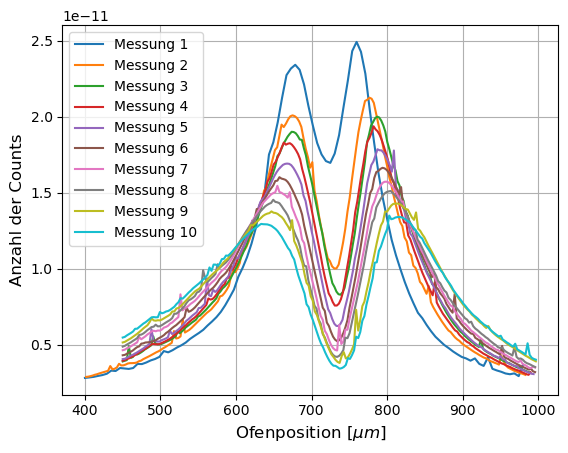

In [5]:
xcalib = [(400,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000)]
ycalib = [(400,980),(450,983),(450,989),(450,990),(450,994),(450,996),(450,996),(450,996),(450,997),(450,997)]

def linear(m:float,b:float,x:np.ndarray):
    return m*x+b

bc =[]

for  i in range(len(xcalib)):
    popt,_ = curve_fit(linear,xcalib[i],ycalib[i])
    
    #Fit anwenden und umrechnen in mu m
    bc.append((popt[1]*bfields[i][:,0]+popt[0])*10.5)
    
    #plt.plot(bfields[i][:,0],bfields[i][:,1], label="Daten vor Korrektur")
    #plt.plot(popt[1]*bfields[i][:,0]+popt[0],bfields[i][:,1],label="Daten nach der Korrektur")
    plt.plot((popt[1]*bfields[i][:,0]+popt[0]),bfields[i][:,1],label="Messung "+str(i+1))
    
    plt.xlabel(r"Ofenposition [$\mu m$]",fontsize = 12)
    plt.ylabel(r"Anzahl der Counts", fontsize = 12)
    plt.legend(loc=0)
    plt.grid(True)
    plt.savefig("Plots/AlleMessungen.pdf")
    #plt.savefig("Plots/Korrektur-x-Achse.pdf")

In [6]:
def doublegaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,
    b: float, mu2: float, sigma2: float,
    y0: float): 
    return (
        y0
        + a * np.exp(-(np.abs(x-mu1)/(np.sqrt(2)*sigma1))**2)
        + b * np.exp(-(np.abs(x-mu2)/(np.sqrt(2)*sigma2))**2)
    )

In [24]:
def fitdoublegaussian(x:list,y:list,p0:float,d:list,ap:list,uap:list): 
    x,y = x,y
    popt1,pcov1 = curve_fit(doublegaussian,x,y,p0=p0)
    
    #Abstand zum Mittelwert
    mean = np.abs((popt1[1] + popt1[4])/2)
    
    #distanz eines Peaks zum Mittelpunkt
    dprint = np.abs(mean- popt1[1])
    d.append(dprint)
    
    #Messfehler der Peaks
    up1 = np.sqrt((popt1[2])**2+u_OfG**2)
    up2 = np.sqrt((popt1[5])**2+u_OfG**2)
    
    #Messfehler Mittelwert
    ud = np.sqrt((0.5*up1 )**2 + (0.5*up2)**2)
    uap.append(ud)
    print("1&",np.round(popt1[1], 2), "$\pm$", np.round(up1,2), " & ", np.round(popt1[4],2), "$\pm$", np.round(up1, 2), " & ", np.round(dprint,2), "$\pm$", np.round(ud,2), "\\"+"\\","\hline")

        
    #print("Peak1: "+str(popt1[1]),"+/-","Abweichung: "+str(popt1[2]),";","Peak2: "+str(popt1[4]),"+/-","Abweichung: "+str(popt1[5]))
    #plt.scatter(x,y,label="data",s=2)
    #plt.plot(x,doublegaussian(x,*popt1),label="fit"+str(i))
    #plt.legend(loc=0)
    #plt.xlabel(r"$u_e$")
    #plt.grid(True, which = "major")
    #plt.xlim((650,770))
    #plt.show()
    #plt.savefig("doublegauß.png")

#plt.plot(np.arange(0,len(bf4[:,0])),bf4[:,1])
plt.plot(bf3[:,0],bf3[:,1])
plt.xlim(600,800)
plt.grid(True)
#plt.plot(np.arange(0,bf1[:,0]),bf1[:,1])

In [25]:
ue = [] 
uue = []
d = []

fitdoublegaussian(bc[0],bf1[:,1], (2.35*1e-11, 680*10.5, 30*10.5, 2.5*1e-11, 775*10.5, 30*10.5, 3e-12),d,ue,uue)
fitdoublegaussian(bc[1],bf3[:,1], (2*1e-11, 712*10.5, 20*10.5, 2.1 *1e-11, 800*10.5, 40*10.5, 1e-11),d,ue,uue)
fitdoublegaussian(bc[2],bf4[:,1], (2*1e-11, 690*10.5, 20*10.5, 2.1 *1e-11, 790*10.5, 40*10.5, 1e-11),d,ue,uue)
fitdoublegaussian(bc[3],bf5[:,1], (1.8*1e-11, 675*10.5, 30*10.5, 1.9 *1e-11, 782*10.5,20*10.5, 21e-11),d,ue,uue)
fitdoublegaussian(bc[4],bf6[:,1], (2*1e-11, 660*10.5, 40*10.5, 2.1 *1e-11, 770*10.5, 20*10.5, 0.6*1e-11),d,ue,uue)
fitdoublegaussian(bc[5],bf7[:,1], (2*1e-11, 690*10.5, 20*10.5, 2.1 *1e-11, 790*10.5, 40*10.5, 1e-11),d,ue,uue)
fitdoublegaussian(bc[6],bf8[:,1], (2*1e-11, 690*10.5, 20*10.5, 2.1 *1e-11, 790*10.5, 40*10.5, 1e-11),d,ue,uue)
fitdoublegaussian(bc[7],bf9[:,1], (1.4 *1e-11, 650*10.5, 20*10.5, 2.1 *1e-11, 810*10.5, 40*10.5, 0.4 * 1e-11),d,ue,uue)
fitdoublegaussian(bc[8],bf10[:,1], (2*1e-11, 645*10.5, 20*10.5, 2.1 *1e-11, 820*10.5, 40*10.5, 1e-11),d,ue,uue)
fitdoublegaussian(bc[9],bf11[:,1], (1.2*1e-11, 630*10.5, 20*10.5, 1.25 *1e-11, 825*10.5, 40*10.5, 0.35*1e-11),d,ue,uue)

print()

1& 7061.68 $\pm$ 435.09  &  8062.28 $\pm$ 435.09  &  500.3 $\pm$ 269.18 \\ \hline
1& 6977.42 $\pm$ 452.67  &  8254.34 $\pm$ 452.67  &  638.46 $\pm$ 281.91 \\ \hline
1& 6977.04 $\pm$ 450.48  &  8374.63 $\pm$ 450.48  &  698.8 $\pm$ 281.48 \\ \hline
1& 6909.41 $\pm$ 455.19  &  8337.87 $\pm$ 455.19  &  714.23 $\pm$ 283.54 \\ \hline
1& 6860.25 $\pm$ 469.56  &  8415.89 $\pm$ 469.56  &  777.82 $\pm$ 290.52 \\ \hline
1& 6783.52 $\pm$ 475.24  &  8468.67 $\pm$ 475.24  &  842.58 $\pm$ 297.56 \\ \hline
1& 6711.59 $\pm$ 491.38  &  8510.14 $\pm$ 491.38  &  899.27 $\pm$ 305.51 \\ \hline
1& 6634.03 $\pm$ 510.46  &  8554.24 $\pm$ 510.46  &  960.11 $\pm$ 315.32 \\ \hline
1& 6598.44 $\pm$ 519.46  &  8676.46 $\pm$ 519.46  &  1039.01 $\pm$ 322.59 \\ \hline
1& 6477.49 $\pm$ 554.68  &  8719.44 $\pm$ 554.68  &  1120.97 $\pm$ 340.01 \\ \hline



In [26]:
#Temepratur
T = [458.15, 458.65,458.65,458.65,458.65,458.65,458.65,458.65,458.65,459.15] # T in K 

uTS = [0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0] #Schwankung der T 
uT1 = 1/(2*np.sqrt(3)) #Ableseungenauigkeit
uT = []

#Unsicherheit der Temperatur
for i in np.arange(0, len(uTS)):
    uT.append(np.sqrt((uT1)**2 + (uTS[i])**2))


In [27]:
#Spulenstrom
I = [0.33,0.395,0.46,0.51,0.58,0.66,0.73,0.81,0.87,0.96]

uA = 0.01/(2*np.sqrt(3)) #Ableseungenauigkeit
uIS = [0,0.5,0,0,0,0,0,0,0,0] #Schwankung von I 
uI = []

#Unsicherheit von A
for i in np.arange(0,len(I)):
    uI.append(np.sqrt((uA)**2 + (uIS[i])**2))

In [40]:
#B-Feld approximation
B = []
uB = []

for i in np.arange(0,len(I)):
    B.append(-0.00512 + 0.55713 * I[i]+0.26883 * I[i]**2 -0.24218 * I[i] **3)
    uB.append(np.sqrt((( 0.55713 + 2 * 0.26883 * I[i]- 3 * 0.24218 * I[i]**2) * uI[i])**2))
print(uB)

[0.0018920853566645034, 0.3280791160985725, 0.0018784603002303193, 0.0018543438310035128, 0.0018029631153737484, 0.0017190742136365394, 0.0016236493512261868, 0.0014894242817397336, 0.0013711378209126583, 0.0011653940353130957]


In [41]:
#Gradient des B-Feldes
dB = []
udB = []
#Gradient des B-Feldes berechnen
for i in np.arange(0,len(B)):
    dB.append((B[i] * eps)/(a))
    udB.append(np.sqrt( ((eps)/(a)*uB[i])**2 + ((B[i]/a) * ueps)**2))
print(dB)

[77.011554140976, 93.495286673334, 109.91974722892796, 122.41676106004799, 139.566747941376, 158.44809850060798, 174.12430910481598, 190.816020817968, 202.312962105744, 217.625566384128]


In [59]:
#Gegebe Werte aus 
for i in range(len(B)):
        print(i+1,'&', np.round(T[i],2), "$\pm$", round(uT[i], sigfigs = 2), "&", np.round(I[i],4), "$\pm$", round(uI[i],sigfigs =2), "&", np.round(B[i],4), "$\pm$",round(uB[i],sigfigs = 2), "&",
          np.round(dB[i],2), "$\pm$",round(udB[i],sigfigs = 2), "\\\\", "\hline")

1 & 458.15 $\pm$ 0.29 & 0.33 $\pm$ 0.0029 & 0.1993 $\pm$ 0.0019 & 77.01 $\pm$ 2.0 \\ \hline
2 & 458.65 $\pm$ 0.58 & 0.395 $\pm$ 0.5 & 0.242 $\pm$ 0.33 & 93.5 $\pm$ 130.0 \\ \hline
3 & 458.65 $\pm$ 0.58 & 0.46 $\pm$ 0.0029 & 0.2845 $\pm$ 0.0019 & 109.92 $\pm$ 2.7 \\ \hline
4 & 458.65 $\pm$ 0.58 & 0.51 $\pm$ 0.0029 & 0.3168 $\pm$ 0.0019 & 122.42 $\pm$ 3.0 \\ \hline
5 & 458.65 $\pm$ 0.58 & 0.58 $\pm$ 0.0029 & 0.3612 $\pm$ 0.0018 & 139.57 $\pm$ 3.4 \\ \hline
6 & 458.65 $\pm$ 0.58 & 0.66 $\pm$ 0.0029 & 0.4101 $\pm$ 0.0017 & 158.45 $\pm$ 3.8 \\ \hline
7 & 458.65 $\pm$ 0.58 & 0.73 $\pm$ 0.0029 & 0.4506 $\pm$ 0.0016 & 174.12 $\pm$ 4.2 \\ \hline
8 & 458.65 $\pm$ 0.58 & 0.81 $\pm$ 0.0029 & 0.4938 $\pm$ 0.0015 & 190.82 $\pm$ 4.6 \\ \hline
9 & 458.65 $\pm$ 0.58 & 0.87 $\pm$ 0.0029 & 0.5236 $\pm$ 0.0014 & 202.31 $\pm$ 4.8 \\ \hline
10 & 459.15 $\pm$ 0.29 & 0.96 $\pm$ 0.0029 & 0.5632 $\pm$ 0.0012 & 217.63 $\pm$ 5.2 \\ \hline


[1.29120745e-48 6.18956839e-50]


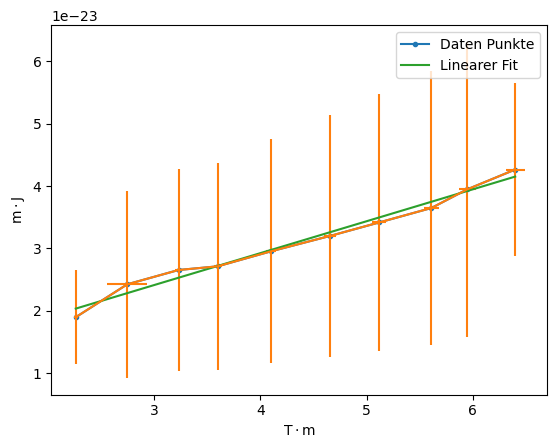

In [47]:
from scipy import constants as const
#all list & const. 
L = 0.07 # in m 
l = 0.455 #in m 
a = 0.0025 # in m

eps = 0.966   #epsilon Wert
ueps = 0.023  #epsilon Unsicherheit 

x = []
y = []
ux = []
uy = []

#cal. das magn. Moment

for i in range(len(d)):
    y.append(d[i] * 10**(-6) * 6 * const.k * T[i])
    x.append(dB[i] * l * L * (1-L/(2*l)))
    uy.append(np.sqrt(( 6 * const.Boltzmann * T[i] *uue[i]/2 * 10**(-6))**2+(d[i] * 10**(-6) * 6 * const.Boltzmann * T[i] * uT[i] )**2))
    ux.append(np.sqrt((dB[i]**2 * 10**(-6) * udB[i] *l  * L * (1-L/(2*l)* 10**(-12)) **2)))
plt.plot(x,y,".-", label = "Daten Punkte")
cap,cap1 = curve_fit(linear,np.array(x),np.array(y))
plt.errorbar(x,y,uy,ux)
plt.plot(x,linear(np.array(x),*cap), label= "Linearer Fit")
plt.xlabel(r"$\mathrm{T\cdot m}$")
plt.ylabel(r"$\mathrm{m\cdot J}$")
plt.legend(loc = 0)
plt.savefig("linearfit.pdf")
print(np.diag(cap1))

In [35]:
print(d,T)

[500.29904357520263, 638.4617694982289, 698.7972518744637, 714.2296079225616, 777.8161980780669, 842.5766976806217, 899.2719725219658, 960.1060310870525, 1039.0077297900143, 1120.9721456274256] [458.15, 458.65, 458.65, 458.65, 458.65, 458.65, 458.65, 458.65, 458.65, 459.15]


In [177]:
#andere mgl der Messunsicheheit: 
